IMPORTAMOS LA BASE DE DATOS

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('Data/attacks.csv', encoding="latin1")


Antes de ponernos a filtrar la base de datos, es importante saber que queremos estudiar o analizar pues en funcion de ello, seremos mas o menos minuciosos con los filtros que apliquemos.

En las actividades más frecuentes (Natacion, Pesca, Deporte de tabla, Buceo y Baño), analizaremos las tendencias de los ataques, mirando similitudes entre ellas para intentar asi concluir cual es la mejor region para practicar estas actividades y en que epoca del año.

In [2]:
data.head(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN


In [3]:
data.rename(str.rstrip, axis=1, inplace=1)

In [4]:
data.shape

(25723, 24)

LA BASE DE DATOS ORIGINAL TIENE 25723 FILAS Y 24 COLUMNAS

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

'N nan cols: 24'

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

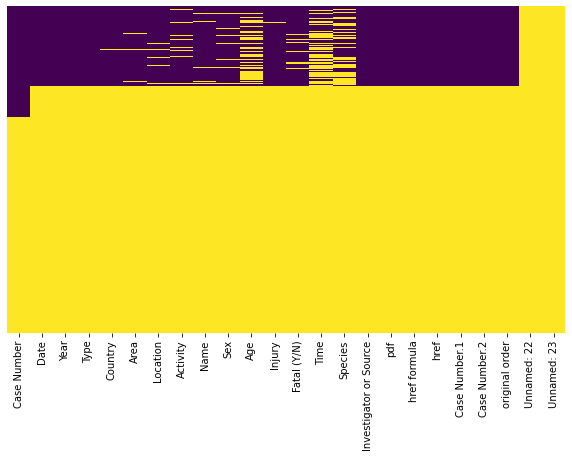

In [6]:
import pylab as plt
import seaborn as sns

def check_nan(df: pd.DataFrame) -> None:
    
    nan_cols  = df.isna().mean()*100
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10,6))

    sns.heatmap(df.isna(),
               yticklabels=False,
               cmap='viridis',
               cbar = False)

    plt.show();
check_nan(data)

In [7]:
data.drop_duplicates(inplace=True)
data.shape

(6312, 24)

In [8]:
nan_cols = data.isnull().sum()
nan_cols[nan_cols>0]

Case Number                  2
Date                        10
Year                        12
Type                        14
Country                     60
Area                       465
Location                   550
Activity                   554
Name                       220
Sex                        575
Age                       2841
Injury                      38
Fatal (Y/N)                549
Time                      3364
Species                   2848
Investigator or Source      27
pdf                         10
href formula                11
href                        10
Case Number.1               10
Case Number.2               10
original order               3
Unnamed: 22               6311
Unnamed: 23               6310
dtype: int64

Habiendo eliminado duplicados vemos que la base de datos tiene muchas anomalias.

In [9]:
len(data.Activity.unique())

1533

In [10]:
data.Activity.unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [11]:
data.Activity.value_counts().head(15)

Surfing           971
Swimming          869
Fishing           431
Spearfishing      333
Bathing           162
Wading            149
Diving            127
Standing           99
Snorkeling         89
Scuba diving       76
Body boarding      61
Body surfing       49
Swimming           47
Kayaking           33
Treading water     32
Name: Activity, dtype: int64

In [12]:
data.Activity = data.Activity.astype(str)
new_Activity = []
for i in data['Activity']:
    if 'scuba' in i.lower() or 'divi' in i.lower() or 'snork' in i.lower():
        new_Activity.append('Buceo')
    elif 'bath' in i.lower():
        new_Activity.append('Baño')
    elif 'swim' in i.lower():
        new_Activity.append('Natacion')
    elif 'fish' in i.lower():
        new_Activity.append('Pesca')
    elif 'boat' in i.lower() or 'raft' in i.lower() or 'sail' in i.lower() or 'paddl' in i.lower() or 'surf' in i.lower() or 'board' in i.lower() or 'kayak' in i.lower() or 'canoe' in i.lower():
        new_Activity.append('Deporte de tabla o barca')
    else:
        new_Activity.append('Otros')

unique_list = list(set(new_Activity))
print("Actividades distintas:", len(unique_list))
unique_list

Actividades distintas: 6


['Natacion', 'Pesca', 'Otros', 'Buceo', 'Baño', 'Deporte de tabla o barca']

In [13]:
print("Actividades distintas antes del filtro:", len(data.Activity.unique()))
data['Activity'] = new_Activity
print("Actividades distintas despues:", len(data.Activity.unique()))
data.Activity.unique()

Actividades distintas antes del filtro: 1533
Actividades distintas despues: 6


array(['Deporte de tabla o barca', 'Otros', 'Buceo', 'Natacion', 'Pesca',
       'Baño'], dtype=object)

In [14]:
data.Activity.value_counts()

Deporte de tabla o barca    1669
Otros                       1504
Pesca                       1139
Natacion                    1112
Buceo                        694
Baño                         194
Name: Activity, dtype: int64

Eliminamos toda la categoria de 'Otros' puesto que esos datos no forman parte de nuestro estudio.

In [15]:
otros_Activity_index = data[data.Activity=='Otros'].index
data.drop(otros_Activity_index, axis=0, inplace=True)

In [16]:
data.shape

(4808, 24)

In [17]:
nan_cols = data.isnull().sum()
nan_cols[nan_cols>0]

Case Number                  1
Year                         2
Type                         3
Country                     31
Area                       294
Location                   349
Name                       106
Sex                        304
Age                       1981
Injury                      12
Fatal (Y/N)                338
Time                      2362
Species                   2052
Investigator or Source      13
href formula                 1
Unnamed: 22               4807
Unnamed: 23               4807
dtype: int64

Vamos a eliminar tambien todas aquellas filas cuya informacion no podemos contrastar ya sea por falta de fuente, investigador o documento que lo certifique.

In [18]:
data.dropna(inplace=True, subset=['Investigator or Source'])
data.dropna(inplace=True, subset=['href formula'])

In [19]:
nan_cols = data.isnull().sum()
nan_cols[nan_cols>0]

Case Number       1
Year              2
Type              2
Country          31
Area            293
Location        349
Name            105
Sex             303
Age            1973
Injury           11
Fatal (Y/N)     335
Time           2352
Species        2045
Unnamed: 22    4793
Unnamed: 23    4793
dtype: int64

Puesto que el objetivo de estudio es analizar los ataques a lo largo del año, eliminaemos todos aquellos cuya fecha no especifique el mes del año en que ocurre el accidente

In [20]:
data.Date = data.Date.astype(str)
month = []
for i in data.Date:
    if 'jan' in i.lower(): month.append('Enero')
    elif 'feb' in i.lower(): month.append('Febrero')
    elif 'mar' in i.lower(): month.append('Marzo')
    elif 'apr' in i.lower(): month.append('Abril')
    elif 'may' in i.lower(): month.append('Mayo')
    elif 'jun' in i.lower(): month.append('Junio')
    elif 'jul' in i.lower(): month.append('Julio') 
    elif 'aug' in i.lower(): month.append('Agosto')
    elif 'sep' in i.lower(): month.append('Septiembre')
    elif 'oct' in i.lower(): month.append('Octubre')
    elif 'nov' in i.lower(): month.append('Noviembre')
    elif 'dec' in i.lower(): month.append('Diciembre')
    else: month.append('Otros')
data.insert(2, 'Month', month, True)

In [21]:
data.head(1)

,Case Number,Date,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,Junio,2018.0,Boating,USA,California,"Oceanside, San Diego County",Deporte de tabla o barca,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN


In [22]:
data.drop(data[data.Month=='Otros'].index, axis=0, inplace=True)

In [23]:
data.shape

(4461, 25)

In [24]:
nan_cols = data.isnull().sum()
nan_cols[nan_cols>0]

Case Number       1
Year              2
Type              2
Country          26
Area            243
Location        276
Name             85
Sex             273
Age            1698
Injury            9
Fatal (Y/N)     309
Time           2050
Species        1840
Unnamed: 22    4460
Unnamed: 23    4460
dtype: int64

Como lo importante de mi estudio no es la especie de tiburon concreta ni el nombre de la victima, podemos rellenar los valores nulos por 'unknow' ya que realmente no es informacion relevante para el estudio.

In [25]:
data.Species.fillna('unknown', inplace=True)
data.Name.fillna('unknow', inplace=True)

En la coluna de edad, tenemos mucho demasiado nulo. Para rellenar estos, calculamos la media de edad de los valores que si conocemos y rellenamos los nulos con este valor.

In [26]:
data.Age.unique()

array(['57', '48', nan, '18', '52', '10', '21', '30', '60', '32', '33',
       '29', '54', '34', '41', '37', '56', '12', '19', '25', '69', '38',
       '55', '46', '45', '14', '40s', '28', '20', '35', '24', '26', '49',
       '22', '7', '31', '17', '15', '40', '13', '42', '11', '8', '16',
       '82', '73', '20s', '68', '51', '58', '61', '65', '36', '66', '43',
       '50', '9', '72', '59', '27', '64', '23', '39', '71', '44', '62',
       '47', '6', '70', '53', '30s', '50s', 'Teen', '63', 'teen', '77',
       '74', '28 & 26', '86', '18 or 20', '12 or 13', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?',
       '33 or 37', ' 30', '7      &    31', ' 28', "60's", '67',
       'Elderly', '75', '20 ', '>50', '18 to 22', 'adult', '? & 19',
       '9 months', '25 to 35', '23 & 26', '(adult)', '33 & 37',
       '21, 34,24 & 35', '30 & 32', '50 & 30', '17 & 35', '3', 'X',
       '13 or 18', '33 & 26', 'MAKE LINE GREEN', ' 43', '81', '"young"',
       '9 or 10', '36 

In [27]:
age = []
for i in data.Age:
    try:
        #Para los valores de la forma "9 or 17" caclulamos la media entre ambos
        if 'or' in i:
            num1 = int(i[:i.index(' or ')])
            num2 = int(i[i.index(' or ')+4:])
            age.append(round((num1+num2)/2))
        #para los valores de la forma XXs
        elif i[-1] == 's':
            age.append(int(i[:-1]))
        elif 'teen' in i.lower(): age.append(16) #media entre los 13 y los 19
        elif 'adult' in i.lower(): age.append(52) #media entre los 40 y los 65
        else: 
            age.append(round(int(i))) 
    except: age.append(None) #ignoramos el resto de casos y en ellos les asignaremos la media
data['Age'] = age

In [28]:
data.Age.fillna(value=round(data.Age.mean()), inplace=True)

In [29]:
data.Age.unique()

array([57., 48., 28., 18., 52., 10., 21., 30., 60., 32., 33., 29., 54.,
       34., 41., 37., 56., 12., 19., 25., 69., 38., 55., 46., 45., 14.,
       40., 20., 35., 24., 26., 49., 22.,  7., 31., 17., 15., 13., 42.,
       11.,  8., 16., 82., 73., 68., 51., 58., 61., 65., 36., 66., 43.,
       50.,  9., 72., 59., 27., 64., 23., 39., 71., 44., 62., 47.,  6.,
       70., 53., 63., 77., 74., 86., 84., 67., 75.,  3., 81.])

In [30]:
nan_cols = data.isnull().sum()
nan_cols[nan_cols>0]

Case Number       1
Year              2
Type              2
Country          26
Area            243
Location        276
Sex             273
Injury            9
Fatal (Y/N)     309
Time           2050
Unnamed: 22    4460
Unnamed: 23    4460
dtype: int64

In [31]:
data.Sex.unique()

array(['F', 'M', nan, 'M ', 'lli', 'N'], dtype=object)

In [32]:
data.Sex.value_counts()

M      3771
F       413
M         2
lli       1
N         1
Name: Sex, dtype: int64

In [33]:
sex = []
for i in data.Sex:
    try:
        if 'F' in i: sex.append('F') 
        elif 'M' in i: sex.append('M')
        else: 
            sex.append(None)
    except:
        sex.append(None)
data['Sex'] = sex

Eliminamos todos las filas cuya informacion sobre el sexo desconocemos.

De la misma manera, como queremos hacer un estudio por Areas, todas aquellas en las que no este especificada el Area, tambien las descartaremos.

In [34]:
data.dropna(inplace=True, subset=['Sex'])
data.dropna(inplace=True, subset=['Area'])

In [35]:
data.Sex.value_counts(normalize=True)

M    0.898587
F    0.101413
Name: Sex, dtype: float64

In [36]:
frecuencia_areas = data.Area.value_counts()
frecuencia_areas[frecuencia_areas < 5]

Vanua Levu                                                        4
Saint-Gilles                                                      4
Mississippi                                                       4
New Providence Island                                             4
US Virgin Islands                                                 4
West Bengal                                                       4
Vava'u                                                            4
Taveuni                                                           4
Guantanamo Province                                               4
 Primorje-Gorski Kotar County                                     4
22ºN, 88ºE                                                        4
Kingston Parish                                                   4
Shatt-al-Arab River                                               4
Loyalty Islands                                                   4
Delaware                                        

In [37]:
frecuencias = {}
for area in data.Area:
    frecuencias[area] = frecuencias.get(area, 0) + 1
#print(frecuencias)

Eliminaremos todos los casos en los que el accidente ha tenido lugar en menos de 10 ocasiones en la misma area. Pues los consideramos como poco frecuentes y casos demasiado puntuales

In [38]:
for area in frecuencias:
    if frecuencias[area] <= 10:
        data.drop(data[data.Area==area].index, axis=0, inplace=True)

In [39]:
data.Area.value_counts()

Florida                  750
New South Wales          348
California               240
Hawaii                   231
Queensland               208
KwaZulu-Natal            129
Western Australia        129
Eastern Cape Province    127
Western Cape Province    126
South Carolina            86
Victoria                  67
South Australia           65
North Carolina            64
Pernambuco                60
Torres Strait             54
Texas                     52
North Island              50
New Jersey                32
Oregon                    28
New York                  26
Tasmania                  26
South Island              26
Abaco Islands             21
Central Province          20
Northern Territory        19
Alabama                   12
Gaza                      12
South Province            11
Massachusetts             11
Name: Area, dtype: int64

In [40]:
nan_cols = data.isnull().sum()
nan_cols[nan_cols>0]

Case Number       1
Year              1
Location         40
Injury            1
Fatal (Y/N)     209
Time           1112
Unnamed: 22    3029
Unnamed: 23    3030
dtype: int64

In [41]:
data.shape

(3030, 25)

<AxesSubplot:>

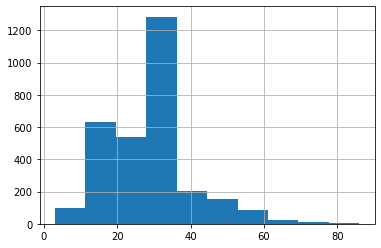

In [42]:
data['Age'].hist()

<AxesSubplot:>

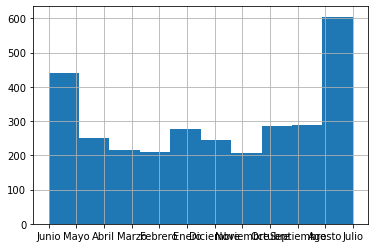

In [43]:
data['Month'].hist()

In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3029.0,1976.596567,73.638198,0.0,1960.00,1994.0,2008.00,2018.0
Age,3030.0,27.666337,11.236167,3.0,20.00,28.0,29.00,86.0
original order,3030.0,3645.741914,1709.566172,14.0,2292.25,3866.5,5085.75,6303.0


<AxesSubplot:>

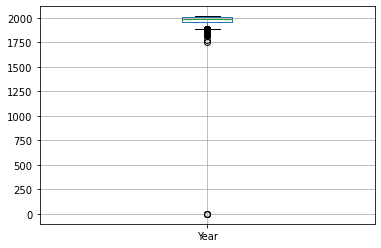

In [45]:
data.boxplot(column=['Year'])

<AxesSubplot:>

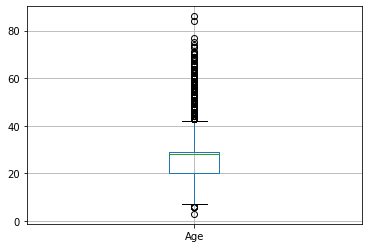

In [46]:
data.boxplot(column=['Age'])

Como vemos muchos outliers, eliminamos filas cuyas edad o años no pasan el test de Tukey

In [47]:
iqr = data.Age.quantile(0.75) - data.Age.quantile(0.25)
cutoff = iqr * 1.5
lower =  data.Age.quantile(0.25) - cutoff
upper = data.Age.quantile(0.75) + cutoff
data.drop(data[(data['Age'] < lower) | (data['Age'] > upper)].index, axis=0, inplace=True)
print("lower:", lower, "upper:", upper)

lower: 6.5 upper: 42.5


<AxesSubplot:>

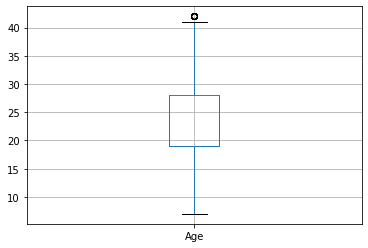

In [48]:
data.boxplot(column=['Age'])

In [49]:
iqr = data.Year.quantile(0.75) - data.Year.quantile(0.25)
cutoff = iqr * 1.5
lower =  data.Year.quantile(0.25) - cutoff
upper = data.Year.quantile(0.75) + cutoff
data.drop(data[(data['Year'] < lower) | (data['Year'] > upper)].index, axis=0, inplace=True)
print("lower:", lower, "upper:", upper)

lower: 1882.0 upper: 2082.0


<AxesSubplot:>

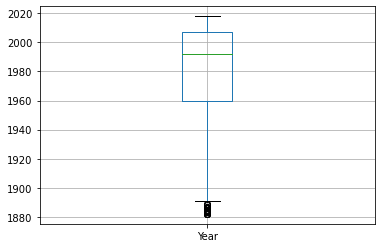

In [50]:
data.boxplot(column=['Year'])

In [51]:
data.head()

,Case Number,Date,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
3,2018.06.08,08-Jun-2018,Junio,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Deporte de tabla o barca,male,M,28.0,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,Junio,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Deporte de tabla o barca,Chris,M,28.0,"No injury, board bitten",N,NaN,unknown,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,Junio,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Natacion,Jose Ernesto da Silva,M,18.0,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
11,2018.05.21,21-May-2018,Mayo,2018.0,Unprovoked,USA,South Carolina,"Isle of Palms, Charleston County",Deporte de tabla o barca,Trey de Boer,M,10.0,Injuries to lower right leg and foot,N,NaN,unknown,"C. Creswell, GSAF",2018.05.21-deBoer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.21,2018.05.21,6292.0,NaN,NaN
12,2018.05.13.b,13-May-2018,Mayo,2018.0,Unprovoked,USA,South Carolina,"Hilton Head Island, Beaufort County",Natacion,Jei Turrell,M,10.0,Severe bite to right forearm,N,15h00,unknown,"C. Creswell, GSAF & K. McMurray TrackingSharks...",2018.05.13.b-Turrell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.b,2018.05.13.b,6291.0,NaN,NaN


In [52]:
data.Area.value_counts()

Florida                  658
New South Wales          294
California               197
Queensland               184
Hawaii                   170
KwaZulu-Natal            121
Eastern Cape Province    119
Western Cape Province    114
Western Australia        108
South Carolina            77
Pernambuco                60
South Australia           56
Texas                     51
Torres Strait             51
Victoria                  50
North Carolina            50
North Island              39
New Jersey                29
Oregon                    25
South Island              24
Tasmania                  22
Central Province          20
Northern Territory        17
Abaco Islands             15
New York                  13
Gaza                      12
South Province            11
Alabama                    6
Massachusetts              6
Name: Area, dtype: int64

In [53]:
data.groupby(['Activity', 'Month', 'Area']).agg({'Area': 'count', 'Age': 'mean'})

Area        Age
Activity                 Month      Area                                  
Baño                     Abril      North Island              1  28.000000
                                    Queensland                2  14.000000
                         Agosto     North Carolina            1  28.000000
                                    Pernambuco                1  24.000000
                                    South Carolina            2  28.000000
                         Diciembre  Gaza                      1  20.000000
                                    New South Wales           4  21.750000
                                    North Island              1  26.000000
                                    Queensland                4  17.500000
                                    South Island              1  12.000000
                                    Western Australia         1  28.000000
                         Enero      New South Wales           6  23.000000
                                    North Island              1  28.000000
                                    Queensland                2  28.000000
                                    South Province            1  28.000000
                                    Victoria                  1  39.000000
                         Febrero    New South Wales           1  30.000000
                                    Queensland                2  23.000000
                                    Victoria                  1  23.000000
                                    Western Australia         1  28.000000
                         Julio      Central Province          1  28.000000
                                    Florida                   1  14.000000
                         Junio      Florida                   1  28.000000
                                    North Carolina            1  28.000000
                                    South Carolina            1  28.000000
                         Marzo      New South Wales           6  22.333333
                                    South Island              1  28.000000
                                    Torres Strait             1  28.000000
                         Mayo       Florida                   2  12.500000
                                    North Island              1  28.000000
                                    South Province            1  28.000000
                                    Western Australia         1  22.000000
                         Noviembre  New South Wales           2  23.500000
                                    North Island              2  28.000000
                                    Queensland                4  20.500000
                                    Western Australia         1  28.000000
                         Octubre    New South Wales           2  22.500000
                                    Northern Territory        1  38.000000
                                    Torres Strait             1  28.000000
                                    Victoria                  1  28.000000
                         Septiembre Florida                   1  28.000000
                                    Queensland                1  22.000000
Buceo                    Abril      Eastern Cape Province     1  28.000000
                                    Florida                   2  22.500000
                                    KwaZulu-Natal             1  28.000000
                                    New South Wales           4  26.250000
                                    Queensland                6  25.666667
                                    South Australia           1  23.000000
                                    Tasmania                  1  28.000000
                                    Torres Strait             1  28.000000
                                    Western Cape Province     1  28.000000
                         Agosto     Abaco Islands             1  34.000000
         

In [54]:
data.shape

(2599, 25)

<AxesSubplot:>

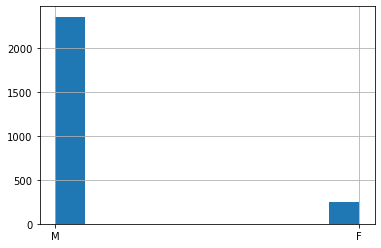

In [55]:
data['Sex'].hist()

<AxesSubplot:>

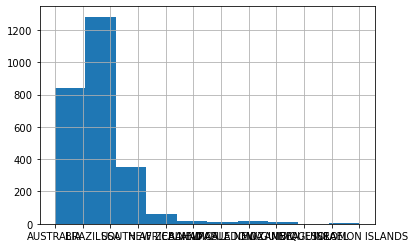

In [56]:
data['Country'].hist()

<AxesSubplot:>

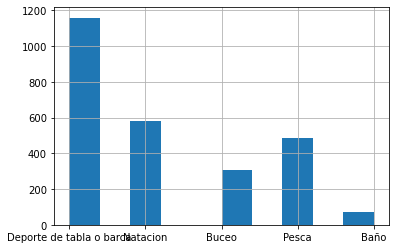

In [57]:
data['Activity'].hist()